In [ ]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import math

#Quadcopter Stability in Wind

##Without wind

Finding $\theta$ (quadcopter's deviation angle) with $F_{t}$ from $14.715 \text{ N}$ $(F_g)$ to $28 \text{ N}$ (quadcopter's maximum $F_t$).

*<small>$F_t$ is the quadcopter's thrust</small><br>
*<small>$F_g$ is the quadcopter's weight (with mass $1.5 \text{ kg}$ and gravitational acceleration of $9.81 \text{ m/s}^2$)</small>

For the quadcopter to be hovering stationarily, its thrust must equal out its weight,
$$F_t\cos(\theta) = F_g$$

We get the quadcopter's deviation angle for it to be hovering stationarily with given thrust,

$$\cos(\theta) = \frac{F_g}{F_t}$$
$$\arccos(\frac{F_g}{F_t}) = \theta$$

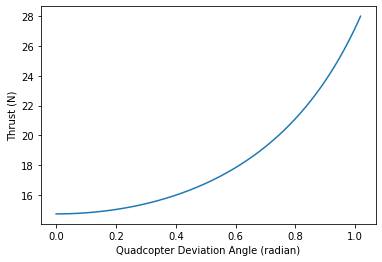

In [ ]:
Ft = np.linspace(14.715, 28, 1000)
theta = np.arccos(14.715/Ft)

plt.plot(theta, Ft)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Thrust (N)')
plt.show()

We plot its thrust projected onto the horizontal axis

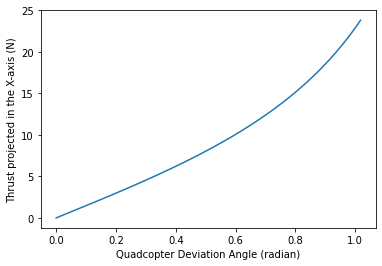

In [ ]:
Fx = Ft * np.sin(theta)

plt.plot(theta, Fx)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Thrust projected in the X-axis (N)')
plt.show()

Its thrust projected in the horizontal axis is the amount of force it could resist in the horizontal axis at a given angle. If said wind were assumed only to be in the direction along the horizontal axis, we can find the resistible wind speed at a given angle.

##With Wind

For a quadcopter with cubed-shaped body where it is assumed only the body is affecting the drag, from the pressure of the wind hitting the surface of the quadcopter's body, the resistible wind speed could be calculated by ($P_w$ is taken from a result by (Richardson, n.d.)),

$$P_w = \frac{F_w}{A(\theta)}$$
$$0.613v^2 = \frac{F_w}{A(\theta)}$$
$$v^2 = \frac{F_w}{0.613A(\theta)}$$
$$v = \sqrt{\frac{F_w}{0.613A(\theta)}}$$

$A(\theta)$ is the surface area of which the wind hits at a given angle, which could be calculated by,

$$A(\theta) = A1\cos(\theta) + A2\sin(\theta)$$

where A1 is the surface area hitting the wind when the quadcopter's deviation angle is at 0 radian, A2 is the surface area not hitting the wind until the quadcopter's angle deviates.

Since the quadcopter's assumed to have a cubed-shaped body, A1 and A2 has no difference, the equation can be simplified to 

$$A(\theta) = A(\cos(\theta) + \sin(\theta))$$

where A is the surface area of one side of the cube.

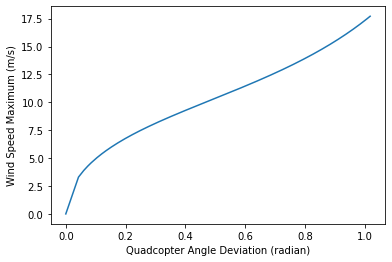

Maximum resistible windspeed for a quadcopter with body dimensions of 30 cm * 30 cm * 30 cm: 17.71235471234675 m/s


In [ ]:
def surface_area(theta, a1, a2):
  a = np.cos(theta) * a1 + np.sin(theta) * a2
  return a

v = np.sqrt(Fx/(0.613*surface_area(theta, 0.3*0.3, 0.3*0.3)))
plt.plot(theta, v)
plt.xlabel('Quadcopter Angle Deviation (radian)')
plt.ylabel('Wind Speed Maximum (m/s)')
plt.show()

print(f"Maximum resistible windspeed for a quadcopter with body dimensions of 30 cm * 30 cm * 30 cm: {v[-1]} m/s")

For comparison, a quadcopter with body of dimensions 40 cm $\times$ 40 cm $\times$ 40 cm should have lower maximum resistible wind speed.

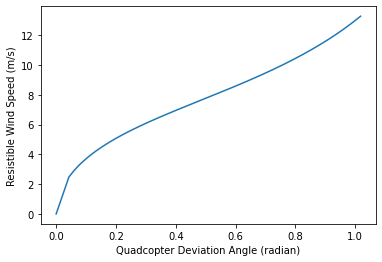

Maximum resistible windspeed for a quadcopter with body dimensions of 40 cm * 40 cm * 40 cm: 13.284266034260062 m/s


In [ ]:
v = np.sqrt(Fx/(0.613*surface_area(theta, 0.4*0.4, 0.4*0.4)))
plt.plot(theta, v)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Resistible Wind Speed (m/s)')
plt.show()

print(f"Maximum resistible windspeed for a quadcopter with body dimensions of 40 cm * 40 cm * 40 cm: {v[-1]} m/s")

## References

Richardson. (n.d.). Minimum Design Loads for Buildings and Other Structures. Retrieved November 8th, 2020, from http://richardson.eng.ua.edu/Former_Courses/DWRS_fa11/Notes/ASCE_7_05_Chapter_6.pdf.

## Archive

In [ ]:
plt.plot(thet, v)
plt.xlabel('Quadcopter Angle (radian)')
plt.ylabel('Wind Speed Maximum (m/s)')
plt.show()
print(v[-1])
print(thet[-1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ft = np.linspace(14.715, 28, 1000)
theta = np.arccos(14.715/Ft)

# Plotting theta and thrust
plt.plot(theta, Ft)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Thrust (N)')
plt.show()

def surface_area(theta, a1, a2):
  a = np.cos(theta) * a1 + np.sin(theta) * a2
  return a

Fx = Ft * np.sin(theta)
v = np.sqrt(Fx/(0.613*surface_area(theta, 0.3*0.3, 0.3*0.3)))
plt.plot(theta, Fx)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Thrust projected onto the X-axis (N)')
plt.show()

plt.plot(theta, v)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Resistible Wind Speed (m/s)')
plt.show()

v = np.sqrt(fx/(0.613*surface_area(thet, 0.4*0.4, 0.4*0.4)))
plt.plot(thet, v)
plt.xlabel('Quadcopter Deviation Angle (radian)')
plt.ylabel('Resistible Wind Speed (m/s)')
plt.show()

In [ ]:
fig, wind = plt.subplots()
wind.set_xlabel('Quadcopter Angle (radian)')
wind.set_ylabel('Wind Speed Maximum (m/s)')


fig2, forces_in_x = wind.twinx()
forces_in_x.set_ylabel('Thrust projected onto the X-axis')
forces.plot()
plt.show()
print(v[-1])
print(thet[-1])

Kalau dikenalin dengan angin
$$F_R = \sqrt{F_t - 2F_wF_t\sin(\theta) + F_w^2}$$

$$\sqrt{F_t - 2F_wF_t\sin(\theta) + F_w^2} = \frac{F_g}{\cos(\theta)}$$
$$F_t - 2F_wF_t\sin(\theta) + F_w^2 = \frac{F_g^2}{\cos^2(\theta)}$$

Jadi, didapatkan $F_w$ dari fungsi kuadrat
$$\sqrt{F_t - 2F_wF_t\sin(\theta) + F_w^2} = \frac{F_g}{\cos(\theta)}$$
$$F_w^2 - 2F_wF_t\sin(\theta) + F_t - \frac{F_g^2}{\cos^2(\theta)} = 0$$

In [ ]:
ft = np.linspace(14.715, 28, 1000)
thet = np.arccos(14.715/ft)
fg = 14.715

a = 1
b = -2*ft*np.sin(thet)
c = ft - (fg**2/(np.cos(thet))**2)
hasilpos = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
hasilneg = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

#plt.plot(thet, ft - hasilneg, 'k')
#plt.plot(thet, ft + hasilneg, 'y')
#plt.plot(thet, ft - hasilpos, 'm')
#plt.plot(thet, ft + hasilpos, 'c')
#plt.plot(thet, hasilneg, 'g')
plt.plot(thet, hasilpos, 'r')
plt.plot(thet, ft, 'b')
plt.xlabel('Angle (radian)')
plt.ylabel('Thrust (N)')
plt.ylim(14, 28)
plt.show()

In [ ]:
print(hasilpos[0])

In [ ]:
plt.plot(thet, hasilpos, 'r')
plt.ylabel('Thrust (N)')
plt.xlabel('Angle (radian)')
plt.show()

In [ ]:
fw_plus_ftx = hasilpos - ft*np.sin(thet)
ft_with_fw = np.sqrt(fw_plus_ftx**2 + (ft*np.cos(thet))**2)
plt.plot(thet, ft_with_fw)
plt.xlabel('Angle (radian)')
plt.ylabel('Thrust (N)')
plt.show()

$$\cos(\theta) \times (F_{tl} + F_{tr}) = F_g$$
$$\cos(\theta) \times (F_{tl} + F_{tr}) = 14.715\text{N}$$

$$A(\theta) = \cos(\theta)A1 + \sin(\theta)A2\\
P_w = \frac{F_w}{A(\theta)}\\
0.613V^2 = \frac{F_w}{A(\theta)}\\
v = \sqrt{\frac{F_w}{0.613A(\theta)}}$$

In [ ]:
def surface_area(theta, a1, a2):
  a = np.cos(theta) * a1 + np.sin(theta) * a2
  return a

v = np.sqrt(fw/(0.613*surface_area(thet, 1, 1)))

plt.plot(thet, v)
plt.xlabel('Angle (radian)')
plt.ylabel('Wind Speed (m/s)')
plt.show()
print(v[5])

In [ ]:
v = np.sqrt(fw/(0.613*surface_area(thet, 4, 4)))

plt.plot(thet, v)
plt.xlabel('Angle (radian)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

Instead, what if
$$P_wA(\theta) = F_w$$
$$(0.613V^2A(\theta))^2 - 2F_t\sin(\theta)(0.613V^2A(\theta)) - 2F_gF_t\cos(\theta) + F_t + F_g^2 - \frac{F_g^2}{cos^2(\theta)} = 0$$
Solve the quadratic equation for $V^2$?

In [ ]:
ft = np.linspace(14.715, 28, 1000)
thet = np.arccos(14.715/ft)
fg = 14.715

area = surface_area(thet, 1, 1)
a = (0.613*area)**2
b = -2*ft*np.sin(thet)*0.613*area
c = -2*fg*ft*np.cos(thet) + ft + fg**2 - (fg**2/(np.cos(thet))**2)
hasilpos = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
hasilneg = (-b - np.sqrt(b**2 - 4*a*c))/(2*a)

#plt.plot(thet, ft - hasilneg, 'k')
#plt.plot(thet, ft + hasilneg, 'y')
#plt.plot(thet, ft - hasilpos, 'm')
#plt.plot(thet, ft + hasilpos, 'c')
plt.plot(thet, hasilneg, 'g')
plt.plot(thet, hasilpos, 'r')
plt.plot(thet, ft, 'b')
plt.xlabel('Angle (radian)')
plt.ylabel('Wind Speed (m/s)')
plt.show()

Didapatkan fungsi kuadratik untuk mencari $F_w$
$$F_w^2 - 2F_t\sin(\theta)F_w - 2F_gF_t\cos(\theta) + F_t + F_g^2 - \frac{F_g^2}{cos^2(\theta)} = 0$$

Mencari $F_w$ sebagai fungsi dari $F_t$ dan $\theta$
$$F_t - 2F_gF_t\cos(\theta) - 2F_wF_t\sin(\theta) + F_g^2 + F_w^2 = \frac{F_g^2}{\cos^2(\theta)}$$
$$-2F_wF_t\sin(\theta) + F_w^2 = \frac{F_g^2}{\cos^2(\theta)} - F_t + 2F_gF_t\cos(\theta) - F_g^2$$
$$F_w(-2F_t\sin(\theta) + F_w) = \frac{F_g^2}{\cos^2(\theta)} - F_t + 2F_gF_t\cos(\theta) - F_g^2$$
$$F_w = \frac{\frac{F_g^2}{\cos^2(\theta)} - F_t + 2F_gF_t\cos(\theta) - F_g^2}{(-2F_t\sin(\theta) + F_w)}$$

In [ ]:
import math
for z in [0,1,2,3] :
    for lamda1 in range (4,5):
        if lamda1 % 2 == 0 :
            print ('maka untuk z :', z)
            print ('maka untuk lambda :', lambda1)

$\Sigma \tau_l = 14 \times 0.5\\
\Sigma \tau_l = x\text{; } 0 \leq x \leq 14\\
\tau = I\alpha\\
\alpha = \frac{\tau}{I}$

In [ ]:
def cari_alpha(x):
  r = 0.5
  m = 1.5
  tau_left = 7 * r + 7 * r
  tau_right = x * r + x * r
  alpha = (tau_left - tau_right)/(4/3 * m * r**2)
  return alpha

x = np.linspace(0, 7, 1000)
hasil = cari_alpha(x)
plt.plot(x, hasil)
plt.xlabel('tau_right')
plt.ylabel('alpha')
plt.show()

$$\omega = \frac{d\theta}{dt}\\
\alpha = \frac{d\omega}{dt}$$

In [ ]:
def dxdt(x, t):
  r = [0, 0]
  r[0] = x[1]
  r[1] = 7
  return r

t = np.linspace(0, 10, 1000)
x0 = [0, 0]
x = odeint(dxdt, x0, t)
plt.plot(t,x[:,0])
plt.show()